In [1]:
# Libraries and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import time
import re



In [2]:
# read pickle from the previous notebook
holidays = pd.read_pickle('./assets/holidays.pkl')
washington = pd.read_pickle('./assets/washington.pkl')

In [3]:
holidays.head()

,date,dayofweek,carrier,flight_no,origin,dest,sched_dep,dep_time,dep_delay,sched_arr,...,arr_delay,sched_elapsed,elapsed_time,distance,tail_no,age(year),aircraft,shipped,tailno,type_code
0,2013-11-17,Sun,DL,1138,ATL,DCA,07:20:00,07:19:00,-1.0,09:00:00,...,-17.0,100.0,84.0,547.0,N906DA,23,McDonnell,1995-05-01,N906DA,MD90
1,2013-11-17,Sun,DL,1139,DCA,ATL,11:00:00,10:53:00,-7.0,12:53:00,...,-1.0,113.0,119.0,547.0,N906DA,23,McDonnell,1995-05-01,N906DA,MD90
2,2013-11-17,Sun,DL,1140,ATL,MSY,23:30:00,23:28:00,-2.0,00:01:00,...,-10.0,91.0,83.0,425.0,N663DN,27,Boeing,1991-01-01,N663DN,B752
3,2013-11-17,Sun,DL,1142,ATL,HOU,13:30:00,13:29:00,-1.0,14:46:00,...,-5.0,136.0,132.0,696.0,N968DL,27,McDonnell,1990-12-01,N968DL,MD88
4,2013-11-17,Sun,DL,1142,HOU,ATL,15:30:00,15:25:00,-5.0,18:27:00,...,-17.0,117.0,105.0,696.0,N968DL,27,McDonnell,1990-12-01,N968DL,MD88


In [4]:
washington.head()

,date,dayofweek,carrier,flight_no,origin,dest,sched_dep,dep_time,dep_delay,sched_arr,...,arr_delay,sched_elapsed,elapsed_time,distance,tail_no,age(year),aircraft,shipped,tailno,type_code
0,2013-09-17,Tue,DL,2125,BWI,ATL,12:40:00,12:37:00,-3.0,14:33:00,...,9.0,113.0,125.0,577.0,N948DL,28,McDonnell,1989-11-01,N948DL,MD88
1,2013-09-17,Tue,DL,2137,BWI,DTW,07:40:00,07:38:00,-2.0,09:13:00,...,-9.0,93.0,86.0,409.0,N958DL,28,McDonnell,1990-03-01,N958DL,MD88
2,2013-09-17,Tue,DL,2145,DCA,DTW,19:00:00,19:32:00,32.0,20:35:00,...,26.0,95.0,89.0,405.0,N913DE,NaN,NaN,NaT,NaN,NaN
3,2013-09-17,Tue,DL,2163,DCA,MSP,06:30:00,06:49:00,19.0,08:04:00,...,29.0,154.0,164.0,931.0,N938DN,22,McDonnell,1995-09-01,N938DN,MD90
4,2013-09-17,Tue,DL,2239,DCA,ATL,17:00:00,17:15:00,15.0,18:50:00,...,34.0,110.0,129.0,547.0,N953DN,22,McDonnell,1996-06-01,N953DN,MD90


In [6]:
holidays.shape, washington.shape

((7084245, 21), (2204975, 21))

In [7]:
# counting null values in dataframe

def isnull_counter(df):
    foobar = df.isnull().sum(axis=0).reset_index()
    foobar.columns = ['variable', 'missing values']
    foobar['filling factor (%)']=(df.shape[0]-foobar['missing values'])/df.shape[0]*100
    return foobar.sort_values('filling factor (%)').reset_index(drop = True).round(4)

# counting categorical columns' value counts
def value_counter(df):
    foobar = df.value_counts().reset_index()
    foobar.columns = ['value', 'counts']
    foobar['(%)'] = df.value_counts(normalize=True).reset_index(drop=True).round(4)
    return foobar

In [8]:
isnull_counter(holidays)

,variable,missing values,filling factor (%)
0,shipped,1535805,78.3208
1,type_code,1133472,84.0001
2,aircraft,696818,90.1638
3,age(year),696818,90.1638
4,tailno,696818,90.1638
5,elapsed_time,145680,97.9436
6,arr_delay,145680,97.9436
7,arr_time,134025,98.1081
8,dep_delay,125785,98.2244
9,dep_time,125780,98.2245


In [9]:
isnull_counterll_counter(washington)

,variable,missing values,filling factor (%)
0,shipped,423248,80.8049
1,type_code,356374,83.8377
2,aircraft,220212,90.0129
3,age(year),220212,90.0129
4,tailno,220212,90.0129
5,elapsed_time,48162,97.8158
6,arr_delay,48162,97.8158
7,arr_time,44131,97.9986
8,dep_delay,41835,98.1027
9,dep_time,41833,98.1028


In [11]:
holidays.dtypes

date             datetime64[ns]
dayofweek                object
carrier                  object
flight_no                 int64
origin                   object
dest                     object
sched_dep                object
dep_time                 object
dep_delay               float64
sched_arr                object
arr_time                 object
arr_delay               float64
sched_elapsed           float64
elapsed_time            float64
distance                float64
tail_no                  object
age(year)                object
aircraft                 object
shipped          datetime64[ns]
tailno                   object
type_code                object
dtype: object

In [12]:
holidays.drop([['shipped', 'tailno']], axis=1, inplace=True)
washington.drop([['shipped', 'tailno']], axis=1, inplace=True)

In [18]:
holidays.aircraft.fillna("Unknown", inplace=True)

In [19]:
washington.aircraft.fillna("Unknown", inplace=True)
holidays.type_code.fillna("Unknown", inplace=True)
washington.type_code.fillna("Unknown", inplace=True)

In [20]:
isnull_counter(holidays)

,variable,missing values,filling factor (%)
0,age(year),696818,90.1638
1,elapsed_time,145680,97.9436
2,arr_delay,145680,97.9436
3,arr_time,134025,98.1081
4,dep_delay,125785,98.2244
5,dep_time,125780,98.2245
6,sched_elapsed,8,99.9999
7,date,0,100.0000
8,tail_no,0,100.0000
9,distance,0,100.0000


In [21]:
isnull_counter(washington)

,variable,missing values,filling factor (%)
0,age(year),220212,90.0129
1,elapsed_time,48162,97.8158
2,arr_delay,48162,97.8158
3,arr_time,44131,97.9986
4,dep_delay,41835,98.1027
5,dep_time,41833,98.1028
6,sched_elapsed,2,99.9999
7,date,0,100.0000
8,tail_no,0,100.0000
9,distance,0,100.0000


In [ ]:
# let's drop age first, and fix it to categorical one later 
## new(<10 years), old(<20 years), older(<40 years), oldest(40< years)

In [22]:
holidays['age(year)'].value_counts()

Unknown    838987
16.0       525214
17.0       503219
15.0       365959
13.0       335141
14.0       317017
18.0       302322
12.0       265125
10.0       244858
11.0       232559
19.0       225443
20.0       205344
9.0        158488
4.0        138515
3.0        134839
5.0        130585
6.0        130367
21.0       121861
26.0       115737
27.0       103215
22.0        97156
8.0         93552
7.0         87082
2.0         85947
25.0        81774
23.0        77727
24.0        72290
1.0         71535
29.0        70069
28.0        65325
            ...  
32.0        10321
41.0         5435
42.0         4748
40.0         4691
39.0         4520
34.0         4082
59.0         3832
38.0         3683
50.0         2959
46.0         2625
43.0         2401
37.0         2277
55.0         1913
49.0         1897
44.0         1749
45.0         1641
57.0         1436
52.0         1208
35.0         1142
48.0         1035
54.0         1030
60.0          869
58.0          773
36.0          760
53.0      

In [26]:
if holidays['age(year)'] !="Unknown":
    return
        holidays['new']=[1 if years in float(years) <= 10.0 else 0 for years in holidays['age(year)']]
#         holidays['old']=[1 if float(years) in (float(years) > 10.0) & (float(years) <= 20.0) else 0 for float(years) in holidays['age(year)']]
#         holidays['older']=[1 if float(years) in (float(years) > 20.0) & (float(years) <= 40.0) else 0 for float(years) in holidays['age(year)']]
#         holidays['oldest']=[1 if float(years) in float(years) > 40.0 else 0 for float(years) in holidays['age(year)']]

IndentationError: unexpected indent (<ipython-input-26-7cfaac11c0cf>, line 3)

In [27]:
holidays.drop(['age(year)'], axis=1, inplace=True)
washington.drop(['age(year)'], axis=1, inplace=True)


In [ ]:
#since the filling factor is over >97%, decided to drop. 

In [28]:
holidays.dropna(inplace=True)
washington.dropna(inplace=True)

In [29]:
holidays.head()

,date,dayofweek,carrier,flight_no,origin,dest,sched_dep,dep_time,dep_delay,sched_arr,arr_time,arr_delay,sched_elapsed,elapsed_time,distance,tail_no,aircraft,type_code
0,2013-11-17,Sun,DL,1138,ATL,DCA,07:20:00,07:19:00,-1.0,09:00:00,08:43:00,-17.0,100.0,84.0,547.0,N906DA,McDonnell,MD90
1,2013-11-17,Sun,DL,1139,DCA,ATL,11:00:00,10:53:00,-7.0,12:53:00,12:52:00,-1.0,113.0,119.0,547.0,N906DA,McDonnell,MD90
2,2013-11-17,Sun,DL,1140,ATL,MSY,23:30:00,23:28:00,-2.0,00:01:00,23:51:00,-10.0,91.0,83.0,425.0,N663DN,Boeing,B752
3,2013-11-17,Sun,DL,1142,ATL,HOU,13:30:00,13:29:00,-1.0,14:46:00,14:41:00,-5.0,136.0,132.0,696.0,N968DL,McDonnell,MD88
4,2013-11-17,Sun,DL,1142,HOU,ATL,15:30:00,15:25:00,-5.0,18:27:00,18:10:00,-17.0,117.0,105.0,696.0,N968DL,McDonnell,MD88


In [67]:
# courtesy by kaggle

def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

# separately by each dataframe
stats = holidays['dep_delay'].groupby(holidays['carrier']).apply(get_stats).unstack()
stats = stats.sort_values('count')
stats

# get groupby stats on delays of each airlines
# count_delays(holidays)

,count,max,mean,min
carrier,,,,
YV,33288.0,578.0,7.122717,-59.0
FL,54094.0,824.0,7.161478,-38.0
9E,66527.0,1174.0,7.460219,-60.0
VX,78557.0,703.0,9.623267,-24.0
HA,93121.0,1377.0,0.524189,-33.0
NK,101452.0,1600.0,9.740478,-40.0
F9,110842.0,993.0,13.949496,-58.0
AS,202754.0,866.0,2.410547,-92.0
US,233166.0,707.0,4.481979,-30.0


In [64]:
count_delays(washington)

,count,max,mean,min
carrier,,,,
9E,14816.0,513.0,8.560813,-23.0
YV,19391.0,438.0,9.653499,-31.0
F9,20797.0,699.0,12.703852,-63.0
AS,21219.0,715.0,2.053160,-25.0
OO,21598.0,1398.0,11.339430,-21.0
VX,26101.0,705.0,7.053446,-24.0
NK,30160.0,1551.0,13.485875,-50.0
MQ,30472.0,1172.0,13.805756,-46.0
FL,42102.0,989.0,8.178091,-23.0


##### set airlines

In [76]:
airlines_names=pd.read_csv('./assets/kaggle/airlines.csv')
airlines_names

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [82]:
airlines_names=airlines_names.append(pd.DataFrame([['FL', 'AirTran'], ['9E', 'Endeavor'], ['YV', 'Mesa']], columns=['IATA_CODE', 'AIRLINE']), ignore_index=True)
carrier_code=airlines_names.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [83]:
carrier_code

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America',
 'FL': 'AirTran',
 '9E': 'Endeavor',
 'YV': 'Mesa'}

##### my way

In [84]:
carrier_code=pd.DataFrame(holidays['carrier'].unique()).rename({0:'IATA'}, axis=1)

In [85]:
air_code= ['Delta', 'JetBlue', 'Atlantic Southeast', 'Frontier', 'AirTran',
 'Hawaiian', 'Envoy', 'Skywest', 'United', 'US Airways', 
 'Endeavor Air', 'American', 'Alaska', 'Virgin America', 'Southwest',
 'Mesa Airlines', 'Spirit']
carrier_code['carrier'] = pd.DataFrame(air_code)

In [86]:
carrier_code

,IATA,carrier
0,DL,Delta
1,B6,JetBlue
2,EV,Atlantic Southeast
3,F9,Frontier
4,FL,AirTran
5,HA,Hawaiian
6,MQ,Envoy
7,OO,Skywest
8,UA,United
9,US,US Airways


In [88]:
carrier_code=carrier_code.set_index('IATA')['carrier'].to_dict()
carrier_code

{'DL': 'Delta',
 'B6': 'JetBlue',
 'EV': 'Atlantic Southeast',
 'F9': 'Frontier',
 'FL': 'AirTran',
 'HA': 'Hawaiian',
 'MQ': 'Envoy',
 'OO': 'Skywest',
 'UA': 'United',
 'US': 'US Airways',
 '9E': 'Endeavor Air',
 'AA': 'American',
 'AS': 'Alaska',
 'VX': 'Virgin America',
 'WN': 'Southwest',
 'YV': 'Mesa Airlines',
 'NK': 'Spirit'}

In [ ]:
# courtesy of kaggle code
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
import warnings 
warnings.filterwarnings('ignore')

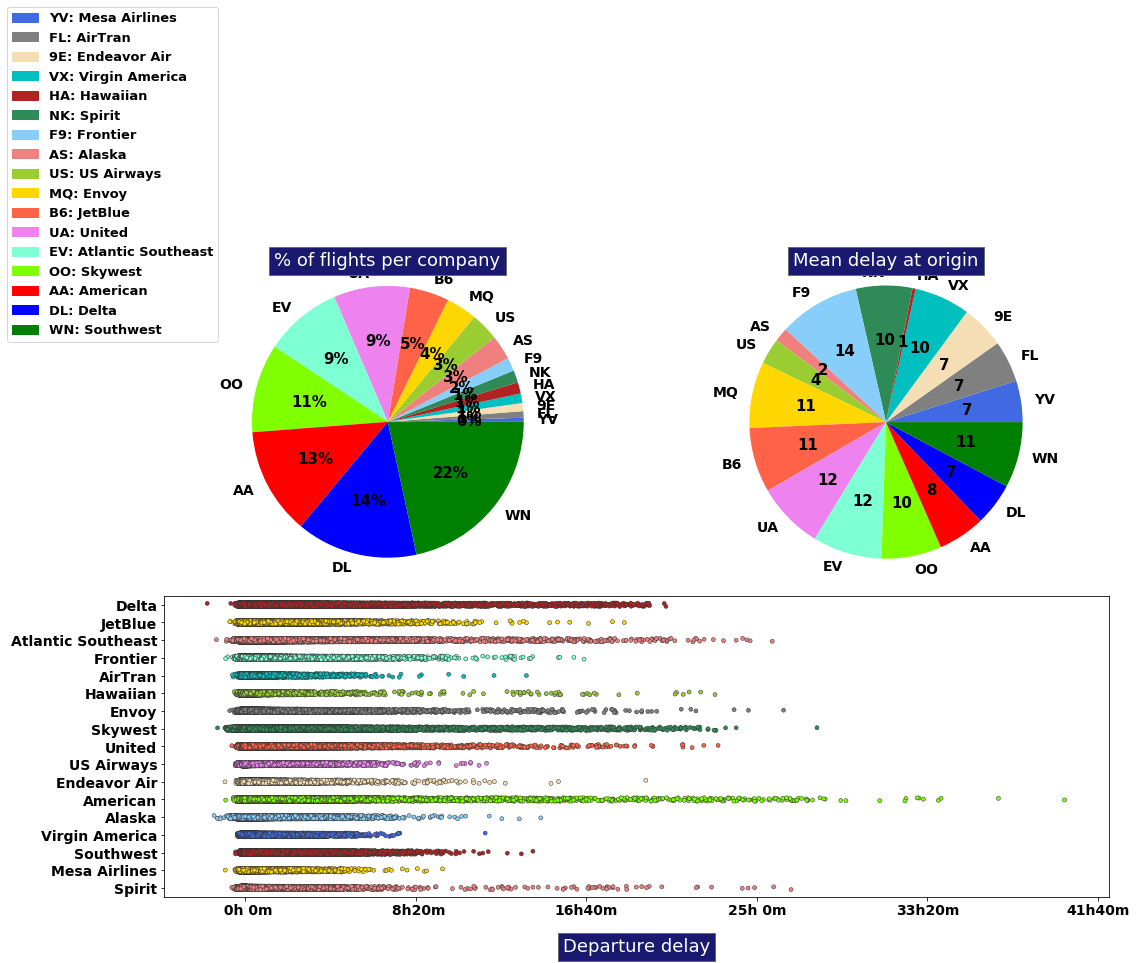

In [90]:
# kaggle one, but it is not working well. 

font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# I extract a subset of columns and redefine the airlines labeling 
holidays2 = holidays.loc[:, ['carrier', 'dep_delay']]
holidays2['carrier'] = holidays2['carrier'].replace(carrier_code)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse',
          'r', 'b', 'g']
#___________________________________
fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 
#------------------------------
# Pie chart nº1: nb of flights
#------------------------------

labels = [s for s in stats.index]
sizes  = stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(carrier_code))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(carrier_code)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(len(carrier_code)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = stats.index[i] + ': ' + carrier_code[stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)

#----------------------------------------
# Pie chart nº2: mean delay at departure
#----------------------------------------
sizes  = stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(carrier_code))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(carrier_code)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)

#------------------------------------------------------
# striplot with all the values reported for the delays
#___________________________________________________________________
# I redefine the colors for correspondance with the pie charts
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
#___________________________________________________________________
ax3 = sns.stripplot(y="carrier", x="dep_delay", size = 4, palette = colors,
                    data=holidays2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3) 

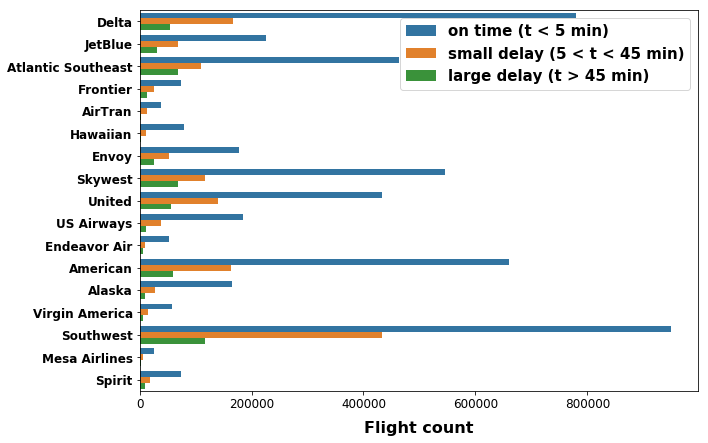

In [91]:
#_____________________________________________
# Function that define how delays are grouped
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
holidays['delay_level'] = holidays['dep_delay'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="carrier", hue='delay_level', data=holidays)
#____________________________________________________________________________________
# We replace the abbreviations by the full names of the companies and set the labels
labels = [carrier_code[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

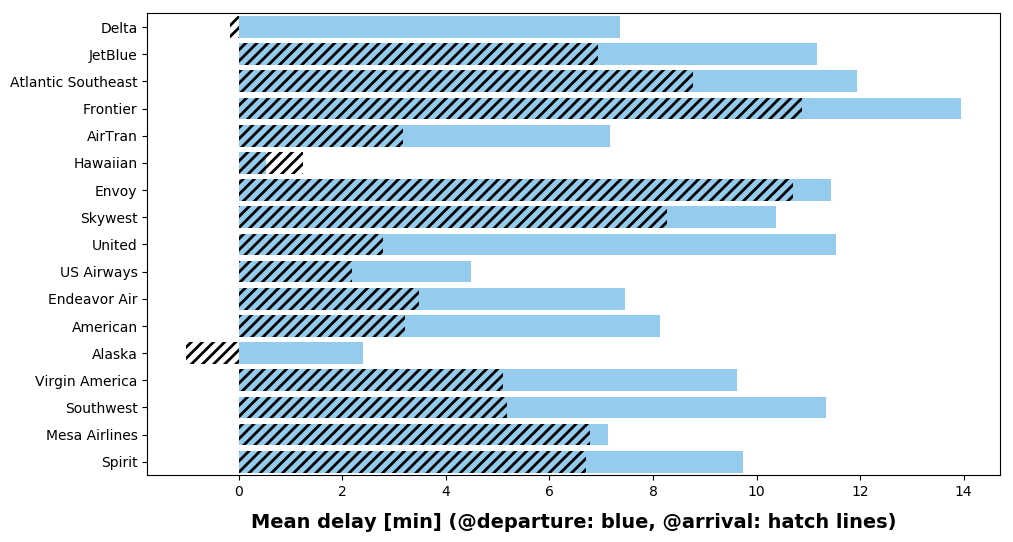

In [93]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0  

fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="dep_delay", y="carrier", data=holidays, color="lightskyblue", ci=None)
ax = sns.barplot(x="arr_delay", y="carrier", data=holidays, color="r", hatch = '///',
                 alpha = 0.0, ci=None)
labels = [carrier_code[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel('Mean delay [min] (@departure: blue, @arrival: hatch lines)',
           fontsize=14, weight = 'bold', labelpad=10);

### Predict flight delays with Holidays datasets

I will build a model that

### Predict flight delays with Washington datasets